# 1. Modelo de Goodwin

Considere un mecanismo de regulación de la expresión de un gen:
\begin{align*}
\frac{dm}{dt} &= \alpha_m g_R(p) − \beta_m m, \\
\frac{de}{dt} &= \alpha_e m − \beta_e e, \\
\frac{dp}{dt} &= \alpha_p e − \beta_p p,
\end{align*}
donde $m$ es la concentración del mRNA, que produce una enzima $e$, que contribuye a la producción de una proteína $p$. La regulación está controlada por la proteína, con una función de represión de la forma: $$g_R(p) = \frac{a}{b + c p^h}.$$

Analice la dinámica para algunos valores del exponente de Hill $h$, y encuentre al menos una situación que tenga oscilaciones de las concentraciones.

Como valores indicativos de los parámetros, puede usar: $\alpha_m = \alpha_e = \alpha_p = 1$, $a = b = c = 1$, $\beta_m = \beta_e = \beta_p = 0.1$. Observe que, en una situación en la que el exponente de Hill permite oscilaciones, éstas también desaparecen si se aceleran las degradaciones $\beta$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm
from models import goodwin_model

# Dinámica del modelo de Goodwin para distintos valores de $h$.

In [2]:
# Parámetros del sistema
alpha_m = 1.0
alpha_e = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta_m = 0.1
beta_e = 0.1
beta_p = 0.1
h = [2.0,4.0,8.0,16.0]  # Exponente de Hill, puedes cambiar este valor para observar diferentes comportamientos

model_instance = []
for h_ in h:
    model_instance.append(goodwin_model(alpha_m, beta_m, alpha_e, beta_e, alpha_p, beta_p, a, b, c, h_))

In [3]:
# Condiciones iniciales
y0 = [0.1, 0.1, 0.1]
# Vector de tiempo
t = np.linspace(0, 1000, 5000)

solution = []
for model_instance_ in model_instance:
    solution.append(odeint(model_instance_.model, y0, t))

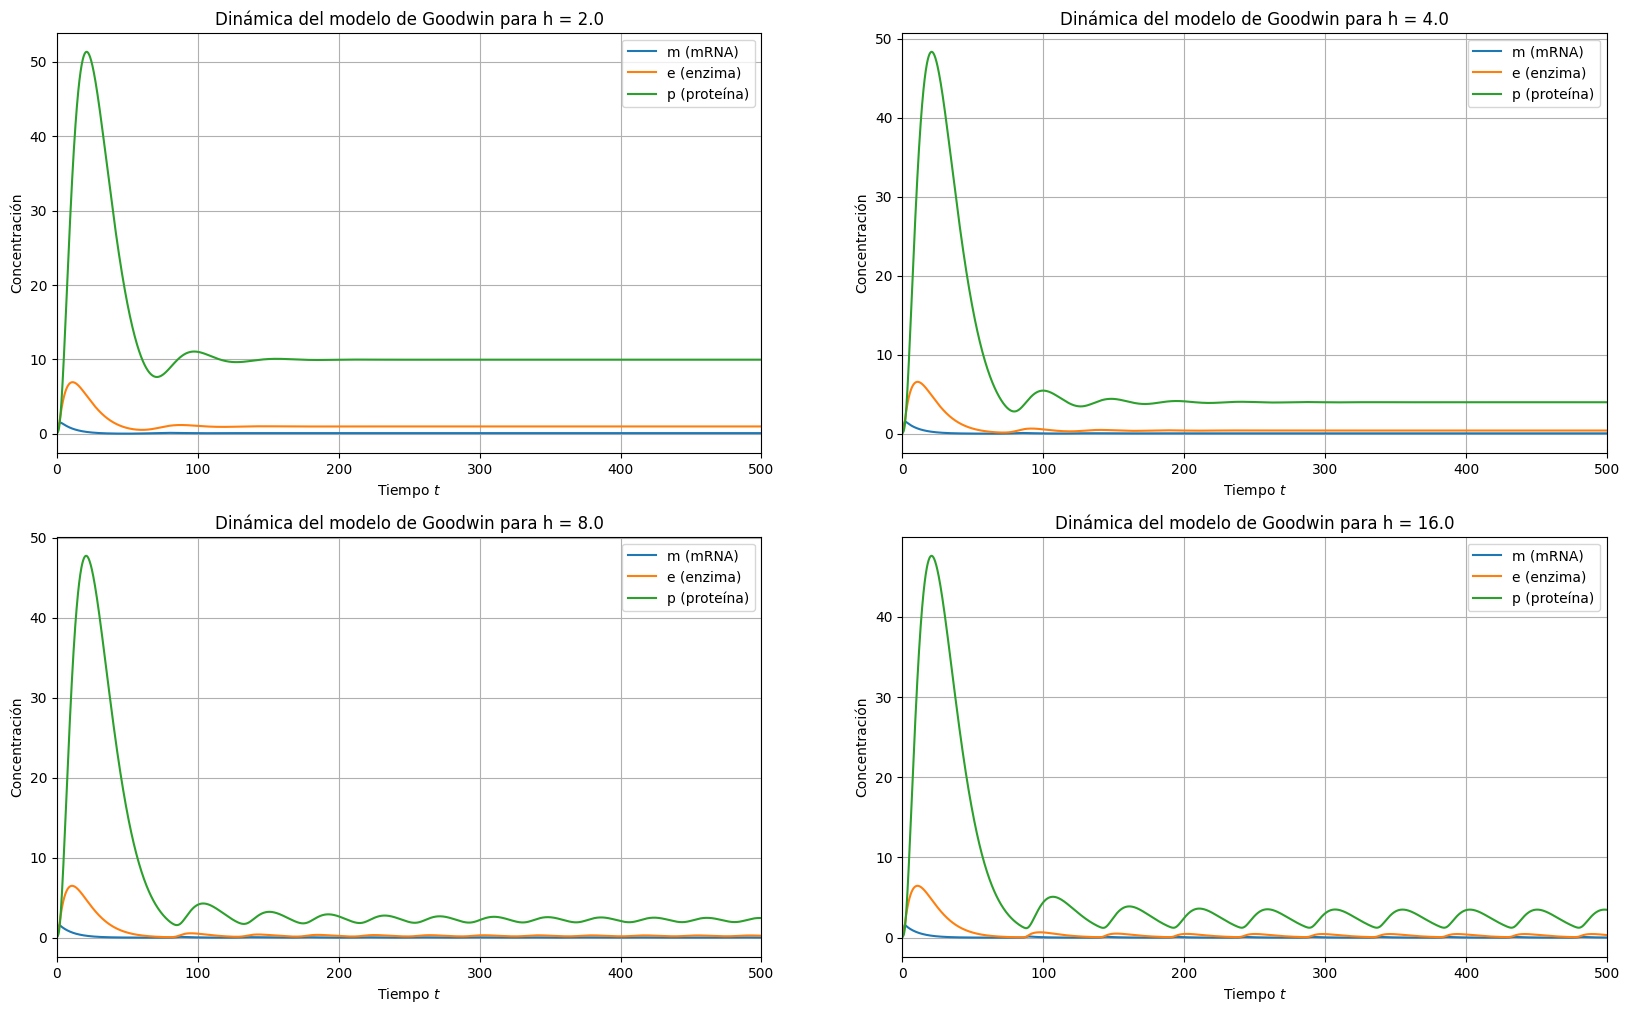

In [4]:
plt.figure(figsize=(20, 12))

for i in range(len(h)):
    plt.subplot(2, 2, i+1)
    m = solution[i][:, 0]
    e = solution[i][:, 1]
    p = solution[i][:, 2]

    # Graficar los resultados
    plt.plot(t, m, label='m (mRNA)')
    plt.plot(t, e, label='e (enzima)')
    plt.plot(t, p, label='p (proteína)')
    plt.xlabel(f'Tiempo $t$')
    plt.ylabel(f'Concentración')
    plt.title(f'Dinámica del modelo de Goodwin para h = {h[i]}')
    plt.xlim(0, 500)
    plt.legend()
    plt.grid(True)


# Dinámica del modelo de Goodwin para distintos valores de $\beta = \beta_m = \beta_e = \beta_p$.

In [5]:
# Parámetros del sistema
alpha_m = 1.0
alpha_e = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta = [0.1, 0.5, 0.75, 1.0] # = beta_m = beta_e = beta_p 
h = 16.0  # Exponente de Hill, puedes cambiar este valor para observar diferentes comportamientos

model_instance = []
for beta_ in beta:
    model_instance.append(goodwin_model(alpha_m, beta_, alpha_e, beta_, alpha_p, beta_, a, b, c, h))

In [6]:
# Condiciones iniciales
y0 = [0.1, 0.1, 0.1]
# Vector de tiempo
t = np.linspace(0, 1000, 5000)

solution = []
for model_instance_ in model_instance:
    solution.append(odeint(model_instance_.model, y0, t))

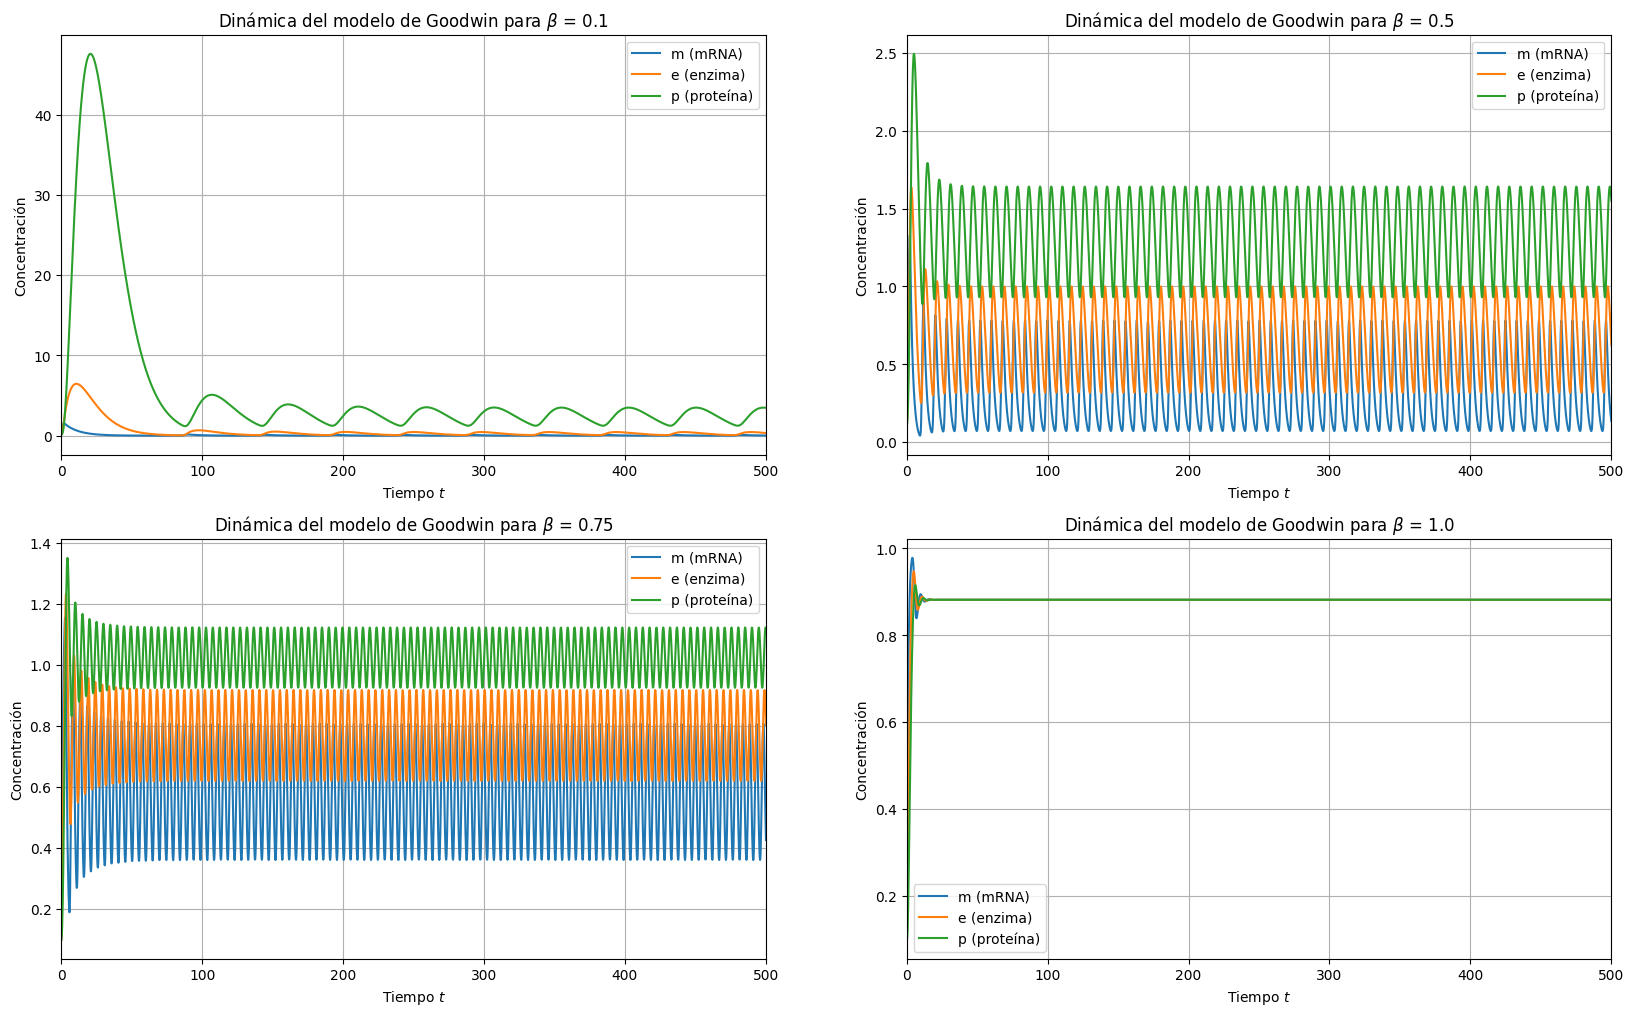

In [7]:
plt.figure(figsize=(20, 12))

for i in range(len(beta)):
    plt.subplot(2, 2, i+1)
    m = solution[i][:, 0]
    e = solution[i][:, 1]
    p = solution[i][:, 2]

    # Graficar los resultados
    plt.plot(t, m, label='m (mRNA)')
    plt.plot(t, e, label='e (enzima)')
    plt.plot(t, p, label='p (proteína)')
    plt.xlabel(f'Tiempo $t$')
    plt.ylabel(f'Concentración')
    plt.title(f'Dinámica del modelo de Goodwin para $\\beta$ = {beta[i]}')
    plt.xlim(0, 500)
    plt.legend()
    plt.grid(True)

# 2. Switch genético

Estudie la dinámica de un sistema de dos genes con represión mutua:
\begin{align}
\frac{dm_1}{dt} &= \alpha_m g_R(p_2) − \beta_m m_1, \\
\frac{dm_2}{dt} &= \alpha_m g_R(p_1) − \beta_m m_2, \\
\frac{dp_1}{dt} &= \alpha_p m_1 − \beta_p p_1, \\
\frac{dp_2}{dt} &= \alpha_p m_2 − \beta_p p_2,
\end{align}
donde las tasas y las funciones de represión son iguales para las especies 1 y 2 para simplificar. Usando la condición $\beta_m \gg \beta_p$ reduzca el sistema a dos variables, y analice la dinámica en el espacio de fases reducido a las proteínas. Estudie la bifurcación que produce la sensibilidad en la función de represión (controlada por $b$ o $c$).

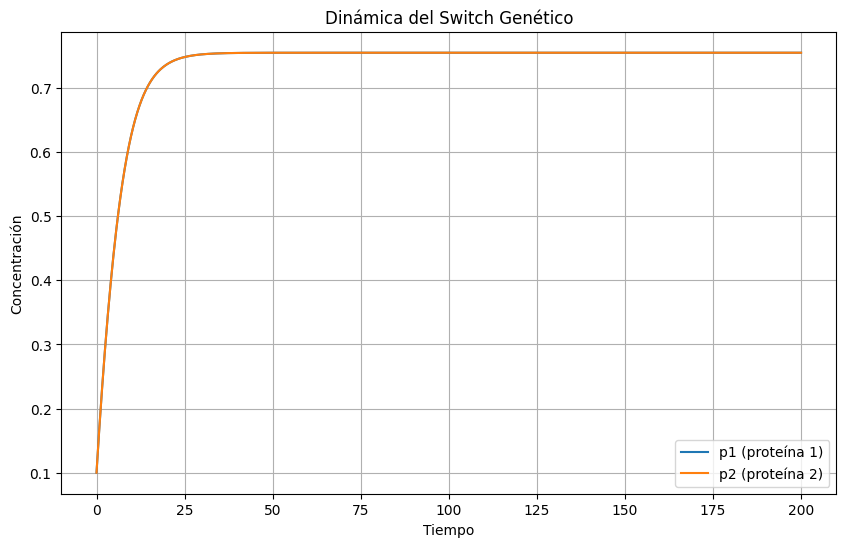

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm
from models import switch_genetico

# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta_m = 10.0  # Usando la condición βm ≫ βp
beta_p = 0.1
h = 4.0  # Exponente de Hill, puedes cambiar este valor para observar diferentes comportamientos

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Condiciones iniciales
y0 = [0.1, 0.1]

# Vector de tiempo
t = np.linspace(0, 200, 1000)

# Resolver el sistema de ecuaciones diferenciales
solution = odeint(model_instance.model_reducido, y0, t)

# Extraer soluciones
p1 = solution[:, 0]
p2 = solution[:, 1]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, p1, label='p1 (proteína 1)')
plt.plot(t, p2, label='p2 (proteína 2)')
plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.title('Dinámica del Switch Genético')
plt.legend()
plt.grid(True)
plt.show()


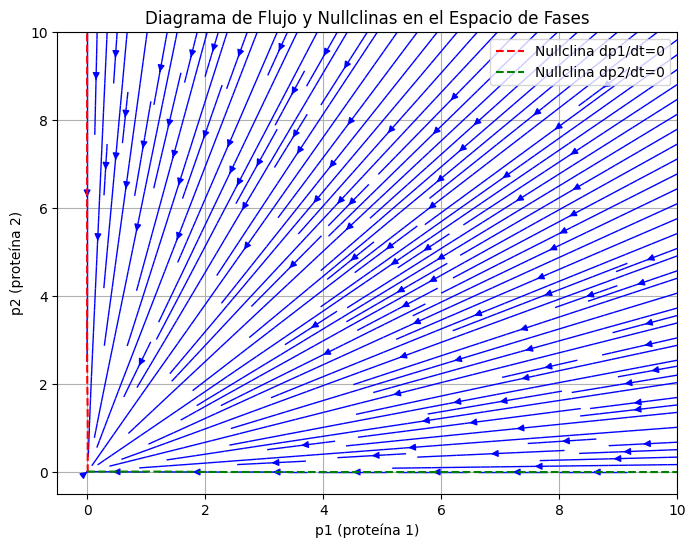

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from models import switch_genetico

# Parámetros del sistema
alpha_m = 1.0
alpha_p = 1.0
a = 1.0
b = 1.0
c = 1.0
beta_m = 10.0  # Usando la condición βm ≫ βp
beta_p = 0.1
h = 8.0  # Exponente de Hill, puedes cambiar este valor para observar diferentes comportamientos

# Crear una instancia del modelo
model_instance = switch_genetico(alpha_m, beta_m, alpha_p, beta_p, a, b, c, h)

# Crear malla para el espacio de fases
p1_range = np.linspace(0, 10, 50)
p2_range = np.linspace(0, 10, 50)
P1, P2 = np.meshgrid(p1_range, p2_range)

# Calcular las derivadas de p1 y p2 en cada punto del espacio de fases
dp1_dt, dp2_dt = model_instance.model_reducido([P1, P2], 0)

# Calcular las nullclinas
nullclina1 = model_instance.nullclina_p1(p2_range)
nullclina2 = model_instance.nullclina_p2(p1_range)

# Graficar el diagrama de flujo (campo vectorial) y las nullclinas
plt.figure(figsize=(8, 6))
plt.streamplot(P1, P2, dp1_dt, dp2_dt, color='blue', linewidth=1, density=2)
plt.plot(nullclina1, p2_range, color='red', linestyle='--', label='Nullclina dp1/dt=0')
plt.plot(p1_range, nullclina2, color='green', linestyle='--', label='Nullclina dp2/dt=0')
plt.xlabel('p1 (proteína 1)')
plt.ylabel('p2 (proteína 2)')
plt.title('Diagrama de Flujo y Nullclinas en el Espacio de Fases')
plt.legend()
plt.grid(True)
plt.show()

